# Анализ спроса в авиакомпании

# Задача:
Предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

# Аббревиатуры:

## Датасет *airports.csv*:

- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года
- airport_code — трёхбуквенный код аэропорта
- airport_name — название аэропорта
- city — город
- timezone — временная зона

## Датасет *aircrafts.csv*:

- aircraft_code — код модели самолёта
- model — модель самолёта
- range — количество самолётов

## Датасет *tickets.csv*:

- ticket_no — уникальный номер билета
- passenger_id — персональный идентификатор пассажира
- passenger_name — имя и фамилия пассажира

## Датасет *flights.csv*:

- flight_id — уникальный идентификатор рейса
- departure_airport — аэропорт вылета
- departure_time — дата и время вылета
- arrival_airport — аэропорт прилёта
- arrival_time — дата и время прилёта
- aircraft_code – id самолёта

## Датасет *ticket_flights.csv*:

- ticket_no — номер билета
- flight_id — идентификатор рейса

## Датасет *festivals.csv*:

- festival_id — уникальный номер фестиваля
- festival_date — дата проведения фестиваля
- festival_city — город проведения фестиваля
- festival_name — название фестиваля

## Оглавление:

[Шаг 1: Файл с данными](#one)

[Шаг 2: Изучить и проверить типы данных на корректность](#two)

[Шаг 3: Выбрать топ-10 городов по количеству рейсов](#three)

[Шаг 4: Графики](#four)


<a id= 'one'></a>
## Шаг 1 

In [1]:
import pandas as pd


In [2]:
data1 = pd.read_csv("/datasets/query_1.csv")
display(data1)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
data2 = pd.read_csv("/datasets/query_3.csv")
display(data2)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<a id= 'two'></a>
## Шаг 2

In [4]:
display(data1.info())
display(data1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [5]:
display(data2.info())
display(data2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


# Вывод: Шаг 2
Анализируя данные, я не нашел пропусков или ошибок в типах данных. 

<a id= 'three'></a>
## Шаг 3

In [6]:
top_flights = data2.sort_values(by = "average_flights", ascending = False)
display(top_flights.head(10))
top_10 = top_flights.query('average_flights > 9.5806').reset_index()
display(top_10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


,index,city,average_flights
0,43,Москва,129.774194
1,70,Санкт-Петербург,31.161290
2,54,Новосибирск,17.322581
3,33,Красноярск,11.580645
4,20,Екатеринбург,11.322581
5,67,Ростов-на-Дону,10.193548
6,63,Пермь,10.129032
7,10,Брянск,10.000000
8,74,Сочи,9.612903
9,84,Ульяновск,9.580645


<a id= 'four'></a>
## Шаг 4 

### Модели самолетов и количество рейсов

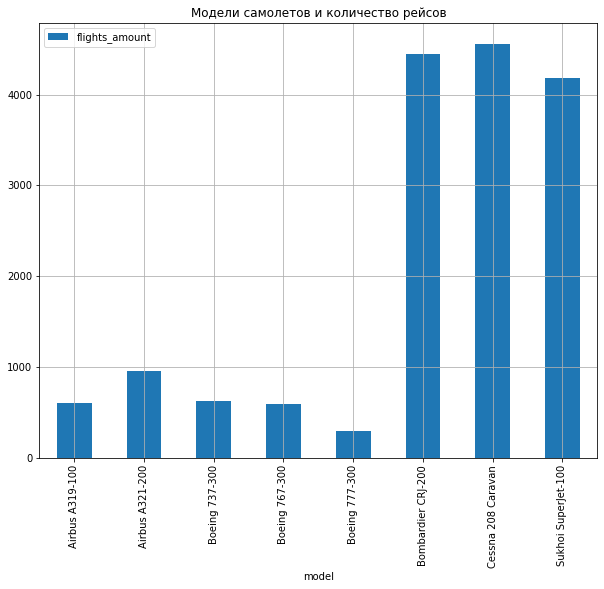

In [7]:
data1.plot(x = "model", y = "flights_amount", kind = "bar", title = "Модели самолетов и количество рейсов", figsize = (10, 8), grid = True )

# Вывод

В таблице явно виден разрыв в популярности использовании моделей самолетов, оказалось, что самые популрные самолеты это "Bombardier CRJ-200	4446", "Cessna 208 Caravan	4557", "Sukhoi SuperJet-100". А компания Boeing оказался менее попурным, чем другие. Инетерес, этот рузкльтат тем, что "Cessna 208 Caravan	4557" является самым популярным из моделей, и он является легким одномоторным самолетом, который используется на авиалиниях малой протяжённости.

### Города и количество рейсов

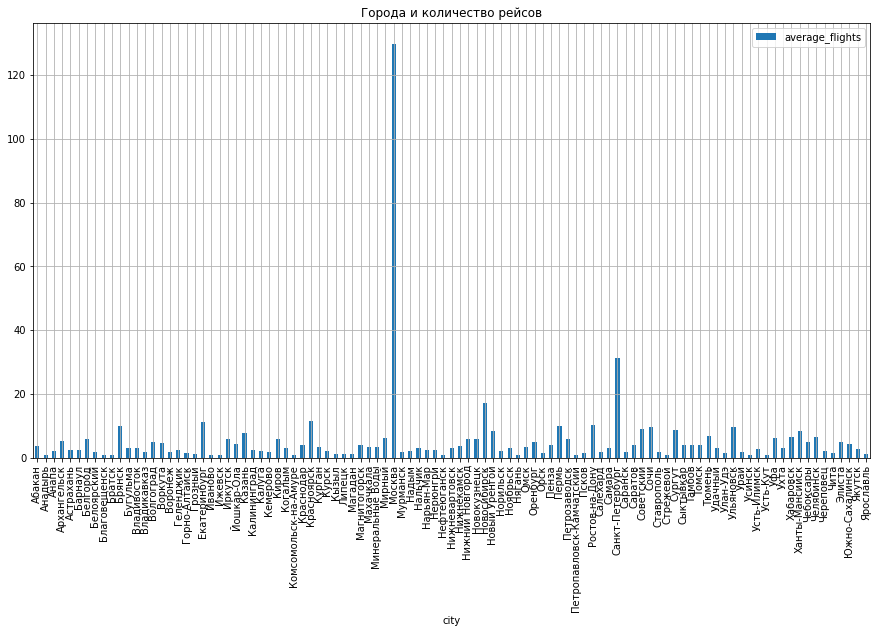

In [8]:
data2.plot(x = "city", y = "average_flights", kind = "bar", title = "Города и количество рейсов", figsize = (15, 8), grid = True )

# Вывод

На графике видно, что многие города имеют примерно одинаковое количество рейсов, но есть пару "анномалий", таких как Москва и Питер, у которых рейсов в разы больше среднего.

### Топ-10 городов и количество рейсов

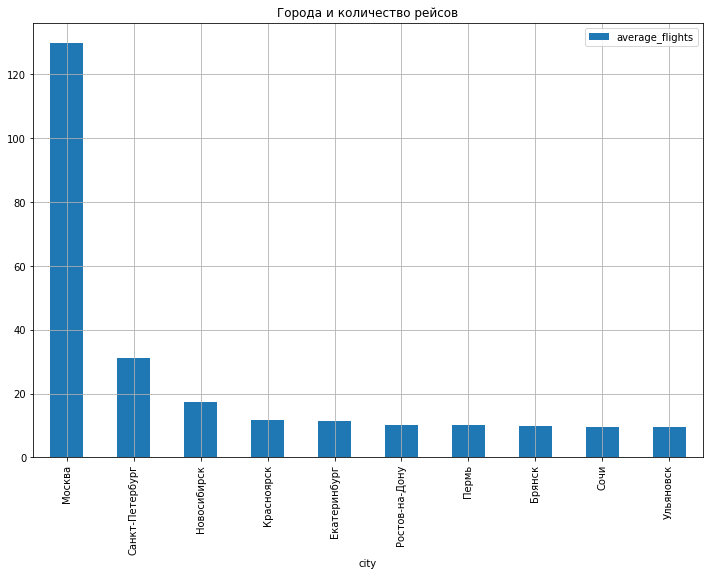

In [9]:
top_10.plot(x = "city", y = "average_flights", kind = "bar", title = "Города и количество рейсов", figsize = (12, 8), grid = True )

# Вывод

Выведя топ 10 самых популярных городов России, все равно видно, что Москва сильно отрывается от других. Предположу, что такая загруженность аэропортов происходит из-за международных перелетов, которые в основном происходят через Москву. К тому же, рейсы которые является транзитными, например с Лондона в Пекин, часто проходит так же через Москву.